In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

An Integration

In [2]:
from math import sin
from math import cos
import numpy as np
import plotly.express as px

x=np.arange(0,1,0.01)
def f(x):
    return ((cos(50*x)+sin(20*x))**2)
func = np.vectorize(f)
fx = func(x)

px.line(x=x,y=fx)


In [4]:
s = np.random.uniform(0,1,10000)
sampf = func(s)
px.histogram(x=s,y=sampf)

In [5]:
value=sum(sampf)/len(sampf)

In [14]:
round(value,2)

0.98

Markov Chain Convergence

In [7]:
#enter code here
from sympy import MatAdd, Matrix, init_printing
P=np.array([[0,1,0,0,0,0,0],[0,0.5,0.5,0,0,0,0],[0.5,0,0.5,0,0,0,0],[0,0,0.25,0.5,0.25,0,0],[0,0,0,0,0,0.5,0.5],[0,0,0,1,0,0,0],[0,0,0,0,0,0,1]])
B=P.dot(P)

err=np.inf
iter=0
while err>10E-10:
    iter+=1
    C=P.dot(B)
    err=np.linalg.norm(B-C,2)
    B=C
M=B.round(decimals=2, out=None)
print('The Limiting transition matrix is:\n\n',B.round(decimals=2, out=None),'\n')
print('The error level is:',err,'\n')
print('The transition matrix converges after ', iter, 'iterations')

The Limiting transition matrix is:

 [[0.2  0.4  0.4  0.   0.   0.   0.  ]
 [0.2  0.4  0.4  0.   0.   0.   0.  ]
 [0.2  0.4  0.4  0.   0.   0.   0.  ]
 [0.13 0.27 0.27 0.   0.   0.   0.33]
 [0.07 0.13 0.13 0.   0.   0.   0.67]
 [0.13 0.27 0.27 0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.   0.   1.  ]] 

The error level is: 7.450367527022777e-10 

The transition matrix converges after  64 iterations


In [3]:
pip install array_to_latex

  Preparing metadata (setup.py) ... done
  Created wheel for clipboard: filename=clipboard-0.0.4-py3-none-any.whl size=1849 sha256=c9becfdd3db5b1f729cd710b924ef68e47ba93ab13ce305ff3b3af9108a3df20
  Stored in directory: /root/.cache/pip/wheels/76/06/fa/282b51f270aaab0f9141d8eec9016e29bce0e081861fabd4c8
Successfully built clipboard
Note: you may need to restart the kernel to use updated packages.


In [4]:
import array_to_latex as a2l

In [10]:
M=B.round(decimals=2, out=None)
a2l.to_ltx(M, frmt = '{:6.2f}', arraytype = 'bmatrix')

\begin{bmatrix}
    0.20 &    0.40 &    0.40 &    0.00 &    0.00 &    0.00 &    0.00\\
    0.20 &    0.40 &    0.40 &    0.00 &    0.00 &    0.00 &    0.00\\
    0.20 &    0.40 &    0.40 &    0.00 &    0.00 &    0.00 &    0.00\\
    0.13 &    0.27 &    0.27 &    0.00 &    0.00 &    0.00 &    0.33\\
    0.07 &    0.13 &    0.13 &    0.00 &    0.00 &    0.00 &    0.67\\
    0.13 &    0.27 &    0.27 &    0.00 &    0.00 &    0.00 &    0.33\\
    0.00 &    0.00 &    0.00 &    0.00 &    0.00 &    0.00 &    1.00
\end{bmatrix}


The Limiting Transition matrix is
\begin{bmatrix}
    0.20 &    0.40 &    0.40 &    0.00 &    0.00 &    0.00 &    0.00\\
    0.20 &    0.40 &    0.40 &    0.00 &    0.00 &    0.00 &    0.00\\
    0.20 &    0.40 &    0.40 &    0.00 &    0.00 &    0.00 &    0.00\\
    0.13 &    0.27 &    0.27 &    0.00 &    0.00 &    0.00 &    0.33\\
    0.07 &    0.13 &    0.13 &    0.00 &    0.00 &    0.00 &    0.67\\
    0.13 &    0.27 &    0.27 &    0.00 &    0.00 &    0.00 &    0.33\\
    0.00 &    0.00 &    0.00 &    0.00 &    0.00 &    0.00 &    1.00
\end{bmatrix}

In [11]:


import numpy as np
import scipy.stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])


def circle(x, y):
    return (x-1)**2 + (y-2)**2 - 3**2


def pgauss(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)


def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples


if __name__ == '__main__':
    samples = metropolis_hastings(circle, iter=10000)
    #sns.jointplot(samples[:, 0], samples[:, 1])
    
    fig = px.scatter(x=samples[:, 0], y=samples[:, 1],marginal_y="histogram",marginal_x="histogram",width=600, height=600)
    fig.show()

    samples = metropolis_hastings(pgauss, iter=10000)
    #sns.jointplot(samples[:, 0], samples[:, 1])
    
    
    fig = px.scatter(x=samples[:, 0], y=samples[:, 1],marginal_y="histogram",marginal_x="histogram",width=600, height=600)
    fig.show()

Rejection Sampling

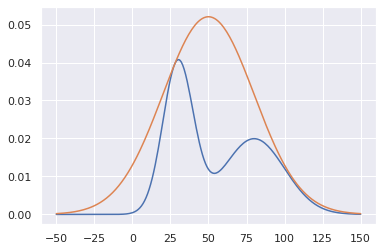

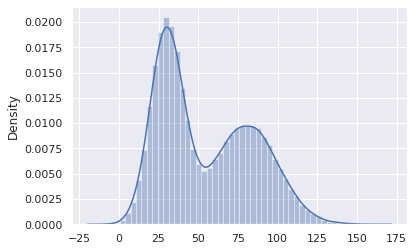

In [12]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()


def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)


def q(x):
    return st.norm.pdf(x, loc=50, scale=30)


x = np.arange(-50, 151)
k = max(p(x) / q(x))


def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)


if __name__ == '__main__':
    plt.plot(x, p(x))
    plt.plot(x, k*q(x))
    plt.show()

    s = rejection_sampling(iter=100000)
    #sns.distplot(s)
    sns.distplot(s)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


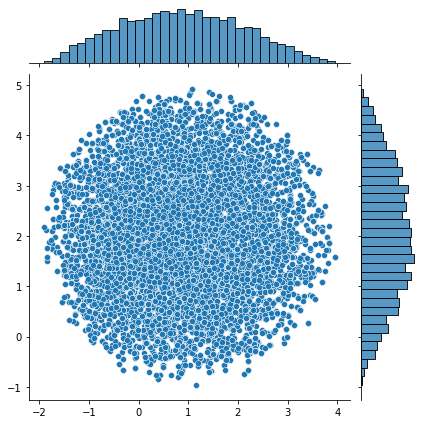

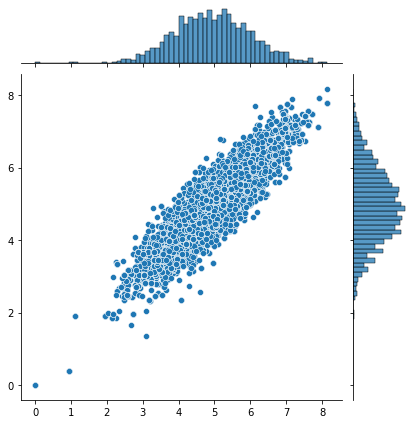

In [2]:
import numpy as np
import scipy.stats as st
import seaborn as sns


mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])


def circle(x, y):
    return (x-1)**2 + (y-2)**2 - 3**2


def pgauss(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)


def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples


if __name__ == '__main__':
    samples = metropolis_hastings(circle, iter=10000)
    sns.jointplot(samples[:, 0], samples[:, 1])

    samples = metropolis_hastings(pgauss, iter=10000)
    sns.jointplot(samples[:, 0], samples[:, 1])

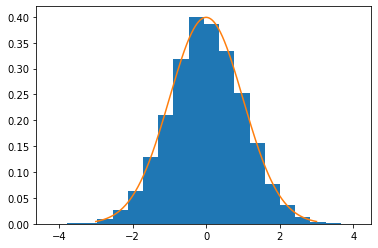

<Figure size 432x288 with 0 Axes>

In [26]:
def normal(x,mu,sigma):
    numerator = np.exp((-(x-mu)**2)/(2*sigma**2))
    denominator = sigma * np.sqrt(2*np.pi)
    return numerator/denominator

def random_coin(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True
    
def gaussian_mcmc(hops,mu,sigma):
    states = []
    burn_in = int(hops*0.2)
    current = random.uniform(-5*sigma+mu,5*sigma+mu)
    for i in range(hops):
        states.append(current)
        movement = random.uniform(-5*sigma+mu,5*sigma+mu)
        
        curr_prob = normal(x=current,mu=mu,sigma=sigma)
        move_prob = normal(x=movement,mu=mu,sigma=sigma)
        
        acceptance = min(move_prob/curr_prob,1)
        if random_coin(acceptance):
            current = movement
    return states[burn_in:]
    
lines = np.linspace(-3,3,1000)
normal_curve = [normal(l,mu=0,sigma=1) for l in lines]
dist = gaussian_mcmc(100_000,mu=0,sigma=1)
plt.hist(dist, bins=20, density=True)
plt.plot(lines,normal_curve)
plt.show()
plt.savefig('books_read.png')


In [23]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#enter code here
from sympy import MatAdd, Matrix, init_printing
P=np.array([[0.8,0.2],[0.3,0.7]])
B=P.dot(P)

err=np.inf
iter=0
while err>10E-10:
    iter+=1
    C=P.dot(B)
    err=np.linalg.norm(B-C,2)
    B=C
M=B.round(decimals=2, out=None)
print('The Limiting transition matrix is:\n\n',B.round(decimals=2, out=None),'\n')
print('The error level is:',err,'\n')
print('The transition matrix converges after ', iter, 'iterations')


The Limiting transition matrix is:

 [[0.6 0.4]
 [0.6 0.4]] 

The error level is: 9.497663723321688e-10 

The transition matrix converges after  28 iterations


In [5]:
M=B.round(decimals=2, out=None)
a2l.to_ltx(M, frmt = '{:6.2f}', arraytype = 'bmatrix')

\begin{bmatrix}
    0.60 &    0.40\\
    0.60 &    0.40
\end{bmatrix}


\begin{bmatrix}
    0.60 &    0.40\\
    0.60 &    0.40
\end{bmatrix}

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



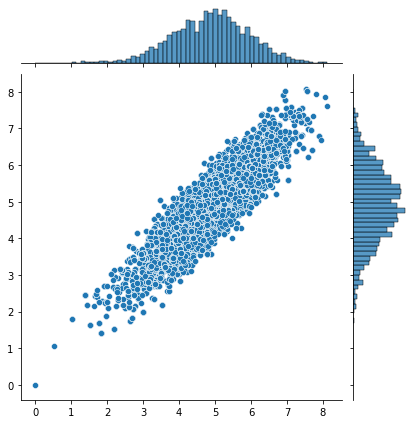

In [8]:
import numpy as np
import scipy.stats as st
import seaborn as sns


mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])


def circle(x, y):
    return (x-1)**2 + (y-2)**2 - 3**2


def pgauss(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)


def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < (p(x_star, y_star) / p(x, y)):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples


if __name__ == '__main__':
    #samples = metropolis_hastings(circle, iter=10000)
    #sns.jointplot(samples[:, 0], samples[:, 1])

    samples = metropolis_hastings(pgauss, iter=10000)
    sns.jointplot(samples[:, 0], samples[:, 1])

In [9]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import plotly.express as px

In [17]:
mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])

def pgauss(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)


def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < (p(x_star, y_star) / p(x, y)):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples

samples = metropolis_hastings(pgauss, iter=10000)
fig = px.scatter(x=samples[:, 0], y=samples[:, 1],marginal_y="histogram",marginal_x="histogram",width=900, height=700)
fig.show()